In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
# import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
from statistics import mode
# import ipyparams # only in notebook, not in jupyter lab

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "total_defl_combined_moliere_water"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

# E_i = 1 PeV

In [3]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_1PeV_water/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict[df] = df_dict_unsorted[df]
# print(df_dict.keys())
E_f = sorted(E_f_unsorted)
# E_f

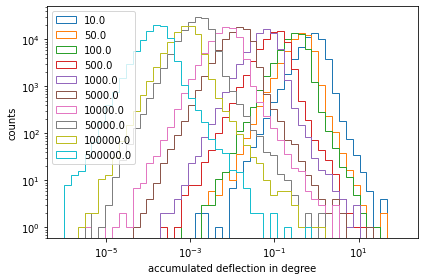

In [4]:
bins = np.logspace(-6, 2, 50)
for i,d in enumerate(df_dict):
    df = df_dict[d]
    plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections.pdf')

# E_i = 100 TeV

In [5]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_100TeV_water/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_100 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_100[df] = df_dict_unsorted[df]
# print(df_dict_100.keys())
E_f_100 = sorted(E_f_unsorted)
# E_f_100

# E_i = 10 TeV

In [6]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10TeV_water/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_10 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10[df] = df_dict_unsorted[df]
# print(df_dict_10.keys())
E_f_10 = sorted(E_f_unsorted)
# E_f_10

# E_i = 10 PeV

In [7]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10PeV_water/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_10P = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10P[df] = df_dict_unsorted[df]
# print(df_dict_10P.keys())
E_f_10P = sorted(E_f_unsorted)
# E_f_10P

# Comparison E_i: 10 TeV / 100 Tev / 1 PeV / 10 PeV

# Use median and central intervals

In [8]:
# E_i = 10 PeV
deflection_median_10P = []
deflection_median_lower_10P = [] 
deflection_median_upper_10P = []
for d in df_dict_10P:
    df = df_dict_10P[d]
    deflection_median_10P.append(np.median(df.deflection))
    deflection_median_lower_10P.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_10P.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

# E_i = 1 PeV    
deflection_median_1P = []
deflection_median_lower_1P = [] 
deflection_median_upper_1P = []
for d in df_dict:
    df = df_dict[d]
    deflection_median_1P.append(np.median(df.deflection))
    deflection_median_lower_1P.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_1P.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))
    
# E_i = 100 TabNine::eV
deflection_median_100 = []
deflection_median_lower_100 = [] 
deflection_median_upper_100 = []
for d in df_dict_100:
    df = df_dict_100[d]
    deflection_median_100.append(np.median(df.deflection))
    deflection_median_lower_100.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_100.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

# E_i = 10 TeV    
deflection_median_10 = []
deflection_median_lower_10 = [] 
deflection_median_upper_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    deflection_median_10.append(np.median(df.deflection))
    deflection_median_lower_10.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_10.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

poly params:  [ 0.02316584 -0.29978879  0.32955878 -0.16738171] , errors:  [0.00096549 0.01125357 0.03942101 0.04014543]
efit params:  [-8.62244724  0.07179988  9.33904436] , errors:  [4.80267957 0.03099067 4.93924118]
efit params:  [-2.65173917  0.17023292  3.13352226] , errors:  [0.66689919 0.02635971 0.74575596]
efit params:  [-1.34170761  0.2602926   1.68481193] , errors:  [0.28085835 0.02988661 0.33708379]
efit params:  [-0.62317376  0.3995188   0.83979274] , errors:  [0.08213464 0.02569832 0.1085746 ]


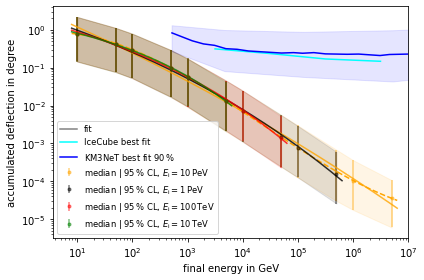

In [9]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1) # , label='poly')


# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c

# E_i = 10 PeV
params, cov = curve_fit(efit, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8) # , label='efit')

plt.errorbar(E_f_10P, deflection_median_10P, yerr=(deflection_median_lower_10P, deflection_median_upper_10P), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P)-np.array(deflection_median_lower_10P), np.array(deflection_median_10P) + np.array(deflection_median_upper_10P), alpha=0.1, color='orange')


# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='black', alpha=0.8) # , label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')


# E_i = 100 TeV
params, cov = curve_fit(efit, np.log10(E_f_100), np.log10(deflection_median_100))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 4.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='red', alpha=0.8) #, label='efit')

plt.errorbar(E_f_100, deflection_median_100, yerr=(deflection_median_lower_100, deflection_median_upper_100), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100)-np.array(deflection_median_lower_100), np.array(deflection_median_100) + np.array(deflection_median_upper_100), alpha=0.1, color='red')


# E_i = 10 TeV
params, cov = curve_fit(efit, np.log10(E_f_10), np.log10(deflection_median_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 3.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='green', alpha=0.8) #, label='efit')

plt.errorbar(E_f_10, deflection_median_10, yerr=(deflection_median_lower_10, deflection_median_upper_10), fmt='.', color='green', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10)-np.array(deflection_median_lower_10), np.array(deflection_median_10) + np.array(deflection_median_upper_10), alpha=0.1, color='green')

plt.plot(0, 0, '-', color='grey', label='fit')

# IceCube 2021
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend(fontsize='small', loc='lower left', )
plt.xlim(right=1e7)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl.pdf')

efit params:  [-2.65173917  0.17023292  3.13352226] , errors:  [0.66689919 0.02635971 0.74575596]


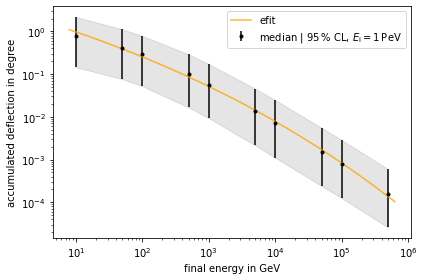

In [10]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8, label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=1, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_1PeV.pdf')

# 10% cut of E_min

In [11]:
mi = 0.9

# E_i = 10 PeV
deflection_median_10P_cut_10 = []
deflection_median_lower_10P_cut_10 = [] 
deflection_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 1 PeV    
deflection_median_1P_cut_10 = []
deflection_median_lower_1P_cut_10 = [] 
deflection_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_1P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TabNine::eV
deflection_median_100_cut_10 = []
deflection_median_lower_100_cut_10 = [] 
deflection_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_100_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
deflection_median_10_cut_10 = []
deflection_median_lower_10_cut_10 = [] 
deflection_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

df_10 10000000.0 10.0 55000 53507 0.9279090909090909 0.9728545454545454 1028.0
df_09 10000000.0 50.0 55000 50990 0.8135818181818182 0.9270909090909091 1079.0
df_04 10000000.0 100.0 57500 51562 0.7505913043478261 0.8967304347826087 1115.0
df_08 10000000.0 500.0 65000 50364 0.4847076923076923 0.7748307692307692 1291.0
df_03 10000000.0 1000.0 72500 51633 0.34593103448275864 0.7121793103448276 1404.0
df_07 10000000.0 5000.0 85000 50952 0.10227058823529411 0.5994352941176471 1668.0
df_02 10000000.0 10000.0 87500 50427 0.057165714285714285 0.5763085714285714 1735.0
df_06 10000000.0 50000.0 142500 78643 0.011585964912280701 0.551880701754386 1812.0
df_01 10000000.0 100000.0 92500 50253 0.005751351351351352 0.5432756756756757 1841.0
df_05 10000000.0 500000.0 92500 49486 0.0011243243243243242 0.5349837837837838 1869.0
df_11 10000000.0 1000000.0 95000 50632 0.0005684210526315789 0.5329684210526315 1876.0
df_12 10000000.0 5000000.0 95000 55285 0.00014736842105263158 0.5819473684210527 1718.0
df_1

poly params:  [ 0.02393006 -0.3103617   0.37348582 -0.20982649] , errors:  [0.0014465  0.01686002 0.0590603  0.06014561]


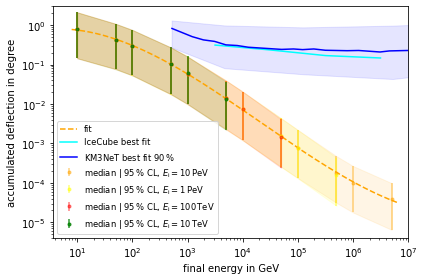

In [12]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit')



plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')


# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')



# IceCube 2021, https://arxiv.org/abs/2103.16931
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016, https://arxiv.org/abs/1601.07459
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly.pdf')

In [13]:
# print median values for E_i = 1 PeV with lower and upper 95% limits
for i, e,d in zip(range(len(E_f)), E_f, deflection_median_1P_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_1P_cut_10[i], d+deflection_median_upper_1P_cut_10[i]))

E_f = 10.0 GeV, med(d) = 0.7890885757732061 ° - 0.1456976657682699 ° + 2.1315436740892695 °
E_f = 50.0 GeV, med(d) = 0.41896624175917924 ° - 0.07681094907279387 ° + 1.0814847801007623 °
E_f = 100.0 GeV, med(d) = 0.2907568426873736 ° - 0.05268219822560662 ° + 0.7564591580988775 °
E_f = 500.0 GeV, med(d) = 0.10270444919907501 ° - 0.01728200897911521 ° + 0.2701128275502263 °
E_f = 1000.0 GeV, med(d) = 0.05922104570331406 ° - 0.010072068237103514 ° + 0.16090917479465605 °
E_f = 5000.0 GeV, med(d) = 0.014260787712221498 ° - 0.002312420735352199 ° + 0.03954444425044754 °
E_f = 10000.0 GeV, med(d) = 0.00737697570077764 ° - 0.001199384881781629 ° + 0.020611762082562362 °
E_f = 50000.0 GeV, med(d) = 0.0015358977377307869 ° - 0.00025530322577105134 ° + 0.004331302381663211 °
E_f = 100000.0 GeV, med(d) = 0.0007850484657391555 ° - 0.00012985851775386837 ° + 0.002205611396092579 °
E_f = 500000.0 GeV, med(d) = 0.0001588432044587684 ° - 2.6138580417173013e-05 ° + 0.0004362350988538443 °


In [14]:
# get relative deviation between median deflection in ice and water 
# deviation is lower than 1% for all energies!!!!!!!!!!!
d_ice = np.array([7.92717382e-01, 4.21333417e-01, 2.92028123e-01, 1.01727364e-01,
       5.92170686e-02, 1.41642340e-02, 7.35518993e-03, 1.53150739e-03,
       7.89943656e-04, 1.58362929e-04])

(d_ice - np.array(deflection_median_1P_cut_10)) / d_ice * 100 # in percent

array([ 0.45776796,  0.56182946,  0.43532804, -0.96049397, -0.00671614,
       -0.68167267, -0.2961959 , -0.2866684 ,  0.61968853, -0.30327518],
      dtype=float128)

In [15]:
deflection_median_10P_cut_10

[0.79150338217522568093,
 0.42027063875051527748,
 0.2932342756713901575,
 0.1012175759191841121,
 0.059028678121102240653,
 0.014155812831099963241,
 0.0073208573158286867227,
 0.0015401160779994301778,
 0.00077872394269746531866,
 0.00017512560410630505606,
 0.000100290243100752244415,
 3.8162822474097349672e-05]

# compare poly fit of: all / hard cut on E_min / 10% cut on E_min

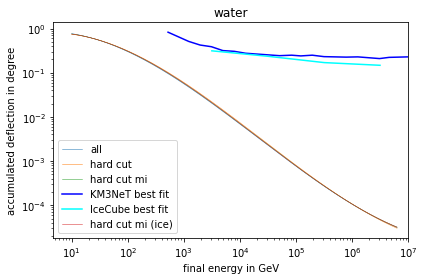

In [16]:
x = np.logspace(1, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), 0.02316584, -0.29978879,  0.32955878, -0.16738171)),linewidth=0.5, label='all')
plt.plot(x, np.power(10, poly(np.log10(x), 0.02356295, -0.31013608,  0.38841735, -0.22984791)),linewidth=0.5, label='hard cut')
plt.plot(x, np.power(10, poly(np.log10(x),  0.02393006, -0.3103617, 0.37348582, -0.20982649)),linewidth=0.5, label='hard cut mi')
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit')
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

plt.plot(x, np.power(10, poly(np.log10(x),  0.02407291, -0.31206222 , 0.37943753, -0.21557717)),linewidth=0.5, label='hard cut mi (ice)')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.title('water')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'compare_fits_different_cuts_E_min.pdf')

# DPG PLOTS

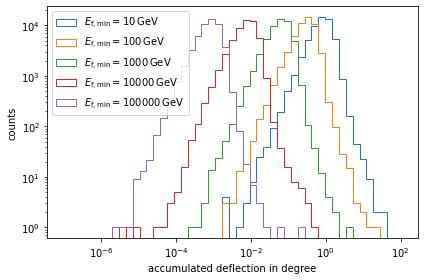

In [17]:
bins = np.logspace(-7, 2, 50)
mi = 0.9
plt.hist(df_dict['df_10'].deflection[df_dict['df_10'].E_f > mi * mode(df_dict['df_10'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_10'].E_f))))
plt.hist(df_dict['df_04'].deflection[df_dict['df_04'].E_f > mi * mode(df_dict['df_04'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_04'].E_f))))
plt.hist(df_dict['df_03'].deflection[df_dict['df_03'].E_f > mi * mode(df_dict['df_03'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_03'].E_f))))
plt.hist(df_dict['df_02'].deflection[df_dict['df_02'].E_f > mi * mode(df_dict['df_02'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_02'].E_f))))
plt.hist(df_dict['df_01'].deflection[df_dict['df_01'].E_f > mi * mode(df_dict['df_01'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_01'].E_f))))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_DPG.pdf')

efit params:  [-1.54207235  0.23564991  1.88258733] , errors:  [0.52946267 0.04512999 0.62158928]


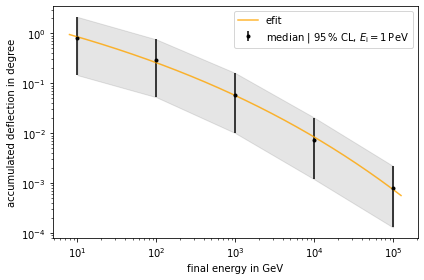

In [18]:
### fit deflection medians
x = np.logspace(0.1, 6, 1000)

E_f_dpg = []
deflection_median_1P_dpg = []
deflection_median_upper_1P_dpg = []
deflection_median_lower_1P_dpg = []
for e in [0, 2, 4, 6, 8]:
    E_f_dpg.append(E_f[e])
    deflection_median_1P_dpg.append(deflection_median_1P_cut_10[e])
    deflection_median_upper_1P_dpg.append(deflection_median_upper_1P_cut_10[e])
    deflection_median_lower_1P_dpg.append(deflection_median_lower_1P_cut_10[e])
# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f_dpg), np.log10(deflection_median_1P_dpg))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.1, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8, label='efit')

plt.errorbar(E_f_dpg, deflection_median_1P_dpg, yerr=(deflection_median_lower_1P_dpg, deflection_median_upper_1P_dpg), fmt='.', color='black', alpha=1, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f_dpg, np.array(deflection_median_1P_dpg)-np.array(deflection_median_lower_1P_dpg), np.array(deflection_median_1P_dpg) + np.array(deflection_median_upper_1P_dpg), alpha=0.1, color='black')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_1PeV_DPG.pdf')